<a href="https://colab.research.google.com/github/hazemfahmy01/House_Pricing_Project/blob/main/House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#importing basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Read and explore Data

In [34]:
#reading train data
train_data= pd.read_csv('/content/train.csv')
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [35]:
#exploring the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##Data cleaning

In [36]:
#Get no of numerical columns and categorical columns
cat_cols = train_data.select_dtypes(include = 'object')
print(f"no of categorical columns = {cat_cols.shape[1]}")

num_cols = train_data.select_dtypes(exclude = 'object')
print(f"no of numerical columns = {num_cols.shape[1]}")

no of categorical columns = 43
no of numerical columns = 38


<Axes: title={'center': 'Null Values Percentage'}>

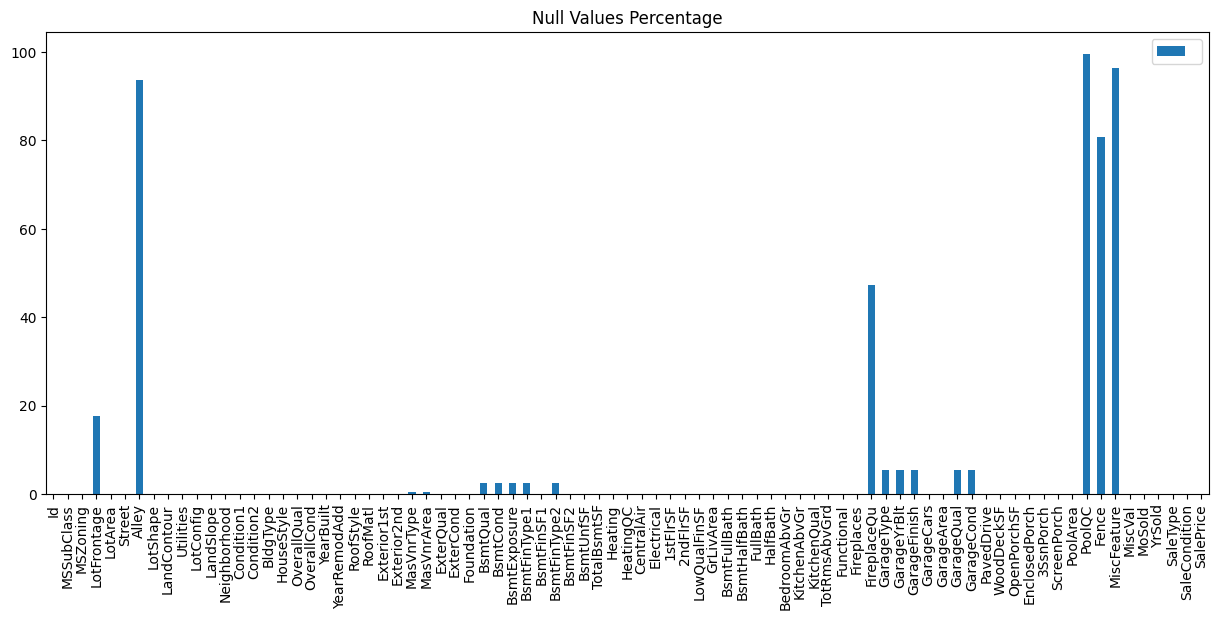

In [37]:
#Show null percentage in each column
x = (train_data.isna().sum()/train_data.shape[0])*100
plt.figure(figsize=(15,6))
plt.title('Null Values Percentage')
x.plot(kind='bar',legend=True)

In [38]:
x.sort_values(ascending=False)

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64

In [39]:
#Drop Columns with null Percentage >75%
d_cols = ['PoolQC','MiscFeature','Alley','Fence']
train_data = train_data.drop(columns = d_cols)


In [40]:
x = (train_data.isna().sum()/train_data.shape[0])*100
x.sort_values(ascending=False)

FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
                  ...    
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
MSSubClass       0.000000
HeatingQC        0.000000
SalePrice        0.000000
Length: 77, dtype: float64

In [41]:
#start filling missing values
#filling missing values in categorical data with mode
train_data['MasVnrType'].fillna(train_data['MasVnrType'].mode()[0],inplace=True)
train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0],inplace=True)
train_data['BsmtCond'].fillna(train_data['BsmtCond'].mode()[0],inplace=True)
train_data['BsmtExposure'].fillna(train_data['BsmtExposure'].mode()[0],inplace=True)
train_data['BsmtFinType1'].fillna(train_data['BsmtFinType1'].mode()[0],inplace=True)
train_data['BsmtFinType2'].fillna(train_data['BsmtFinType2'].mode()[0],inplace=True)
train_data['FireplaceQu'].fillna(train_data['FireplaceQu'].mode()[0],inplace=True)
train_data['GarageType'].fillna(train_data['GarageType'].mode()[0],inplace=True)
train_data['GarageFinish'].fillna(train_data['GarageFinish'].mode()[0],inplace=True)
train_data['GarageQual'].fillna(train_data['GarageQual'].mode()[0],inplace=True)
train_data['GarageCond'].fillna(train_data['GarageCond'].mode()[0],inplace=True)
train_data['Electrical'].fillna(train_data['Electrical'].mode()[0],inplace=True)

In [42]:
#filling numerical data with median and mode (After refeering to meaning of each data column and choose what to fill)
train_data['LotFrontage'].fillna(train_data['LotFrontage'].median(),inplace=True)
train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].median(),inplace=True)
train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mode()[0],inplace=True)

In [43]:
#Checking that all data are now with no null values
x = (train_data.isna().sum()/train_data.shape[0])*100
x.sort_values(ascending=False)

Id             0.0
HalfBath       0.0
FireplaceQu    0.0
Fireplaces     0.0
Functional     0.0
              ... 
MasVnrArea     0.0
MasVnrType     0.0
Exterior2nd    0.0
Exterior1st    0.0
SalePrice      0.0
Length: 77, dtype: float64

##Data Analysis

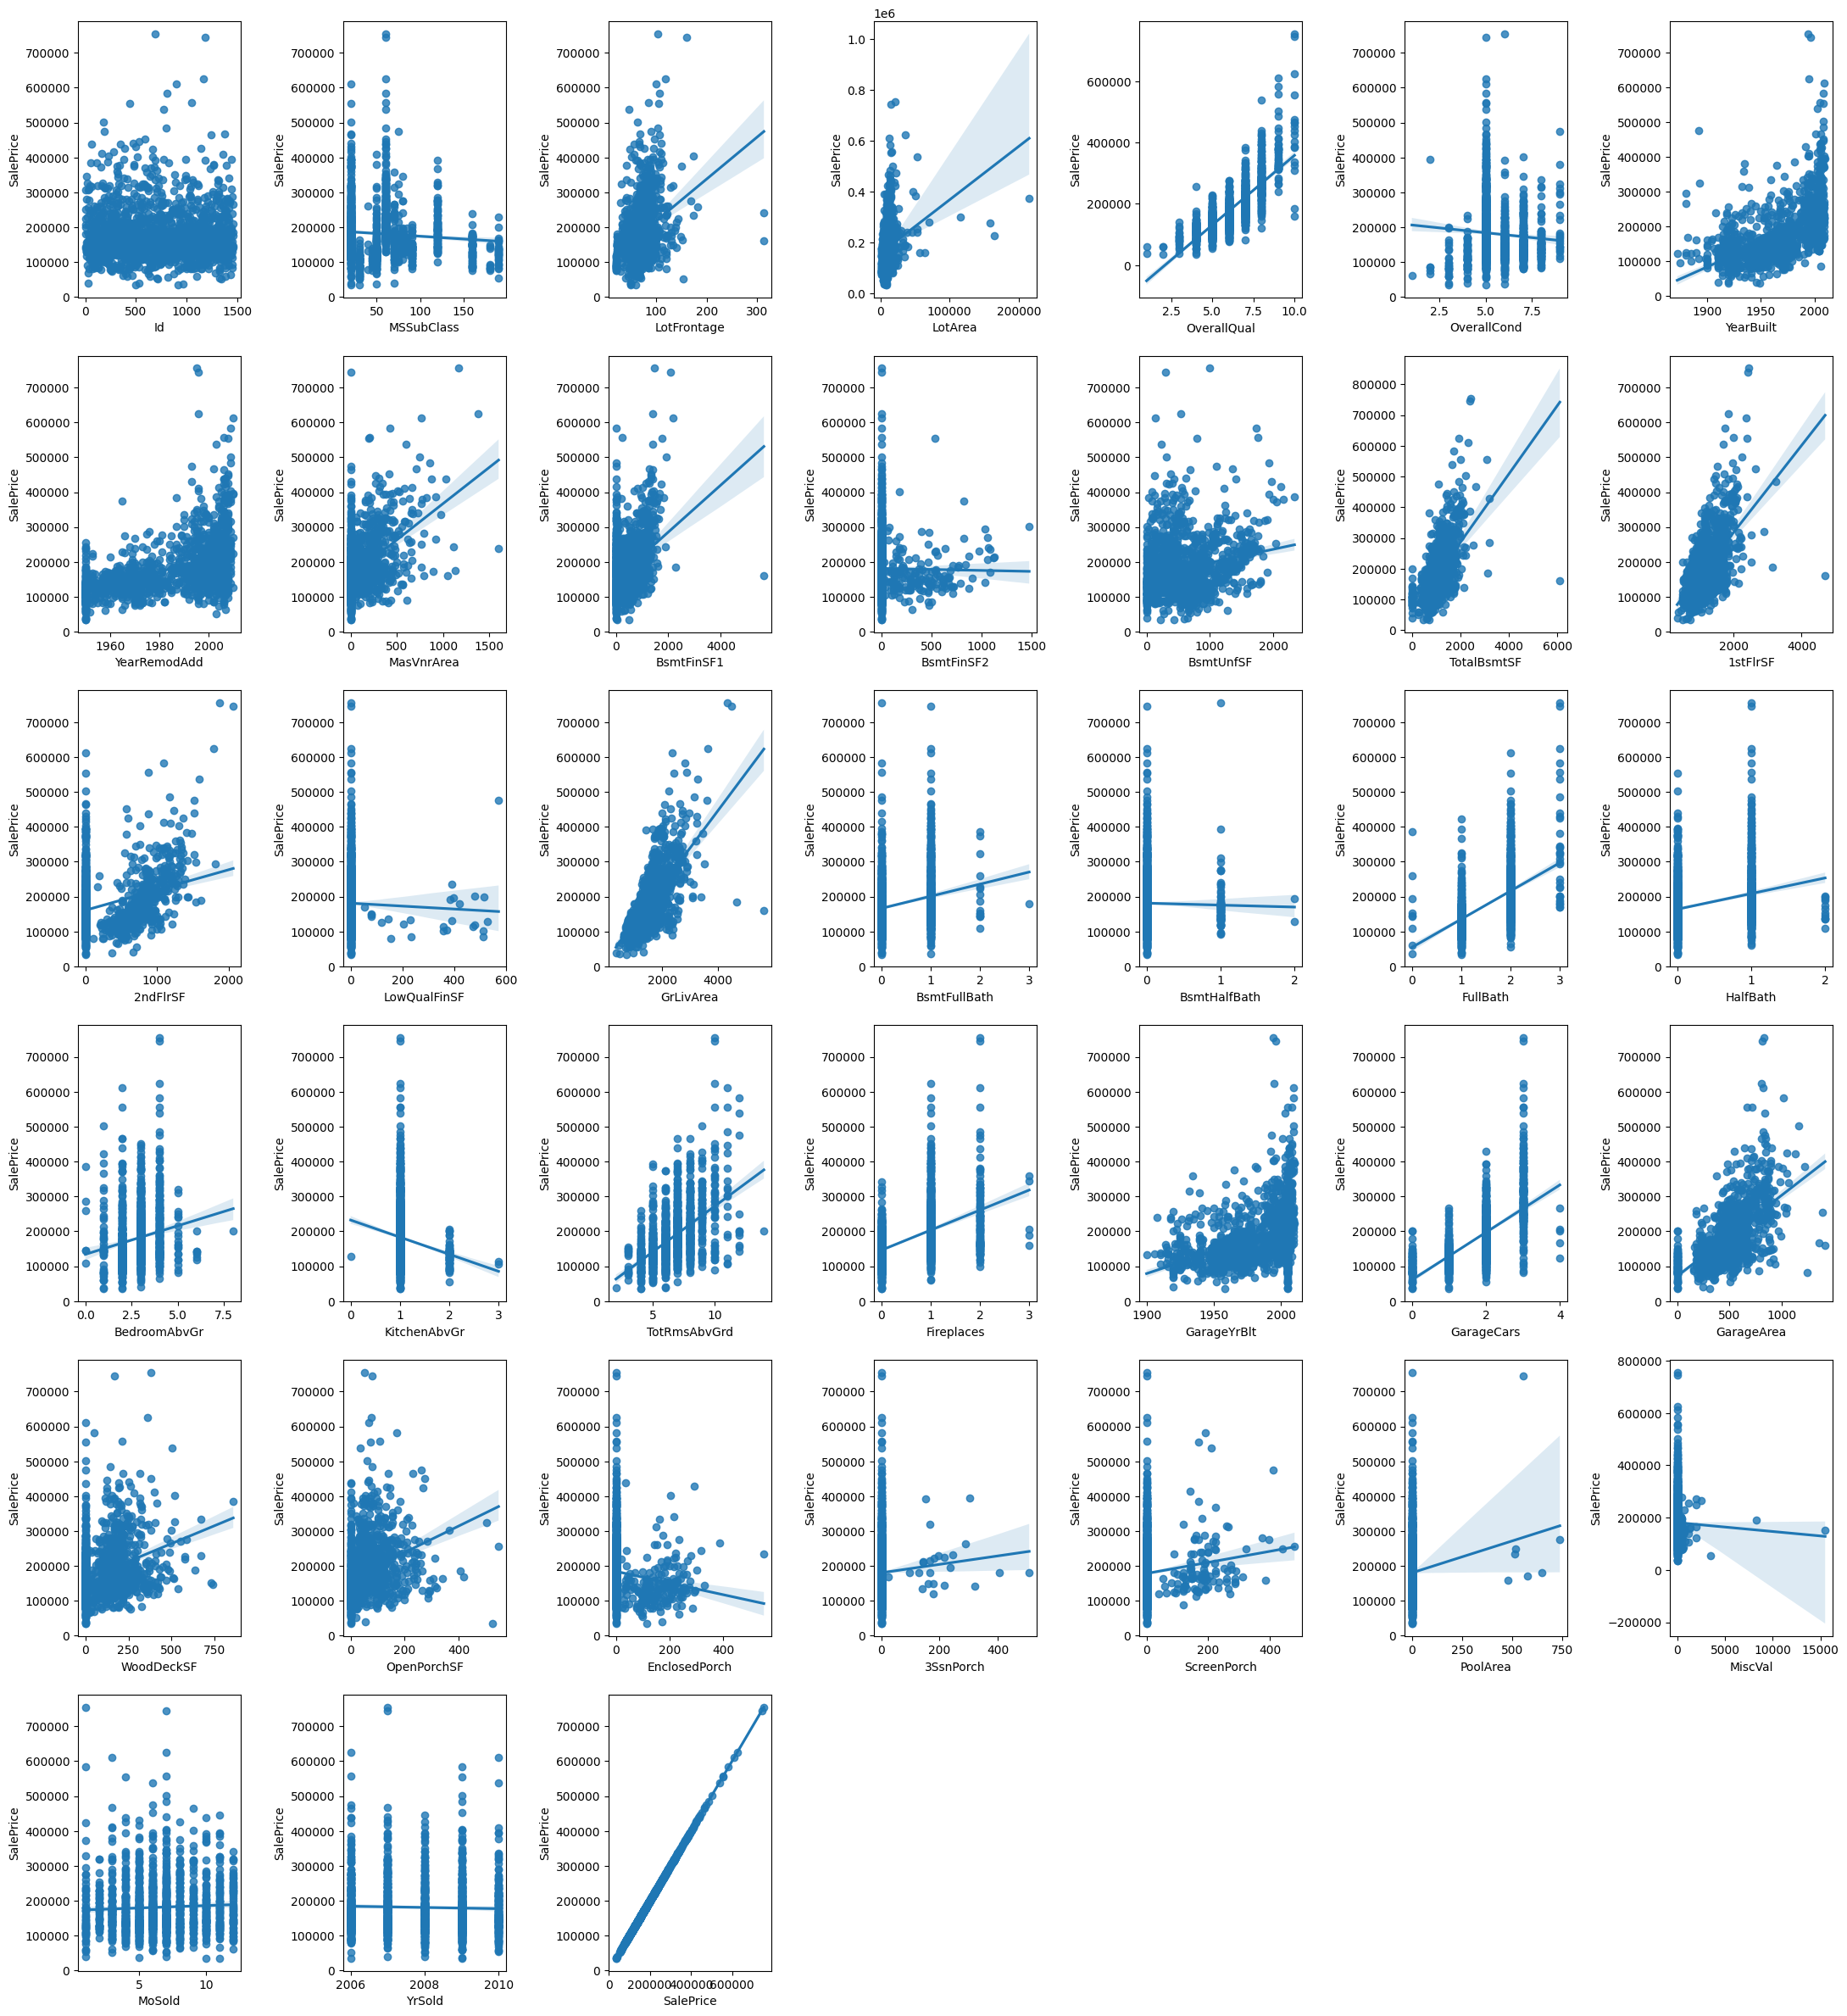

In [44]:
#Plotting regression of numerical data with price
fig = plt.figure(figsize=(22,24))
for ind,col in enumerate(train_data.select_dtypes(exclude=['object'])):
    plt.subplot(6,7,ind+1)
    sns.regplot(data= train_data, x=train_data[col],y=train_data['SalePrice'])
fig.tight_layout(pad=1.5)

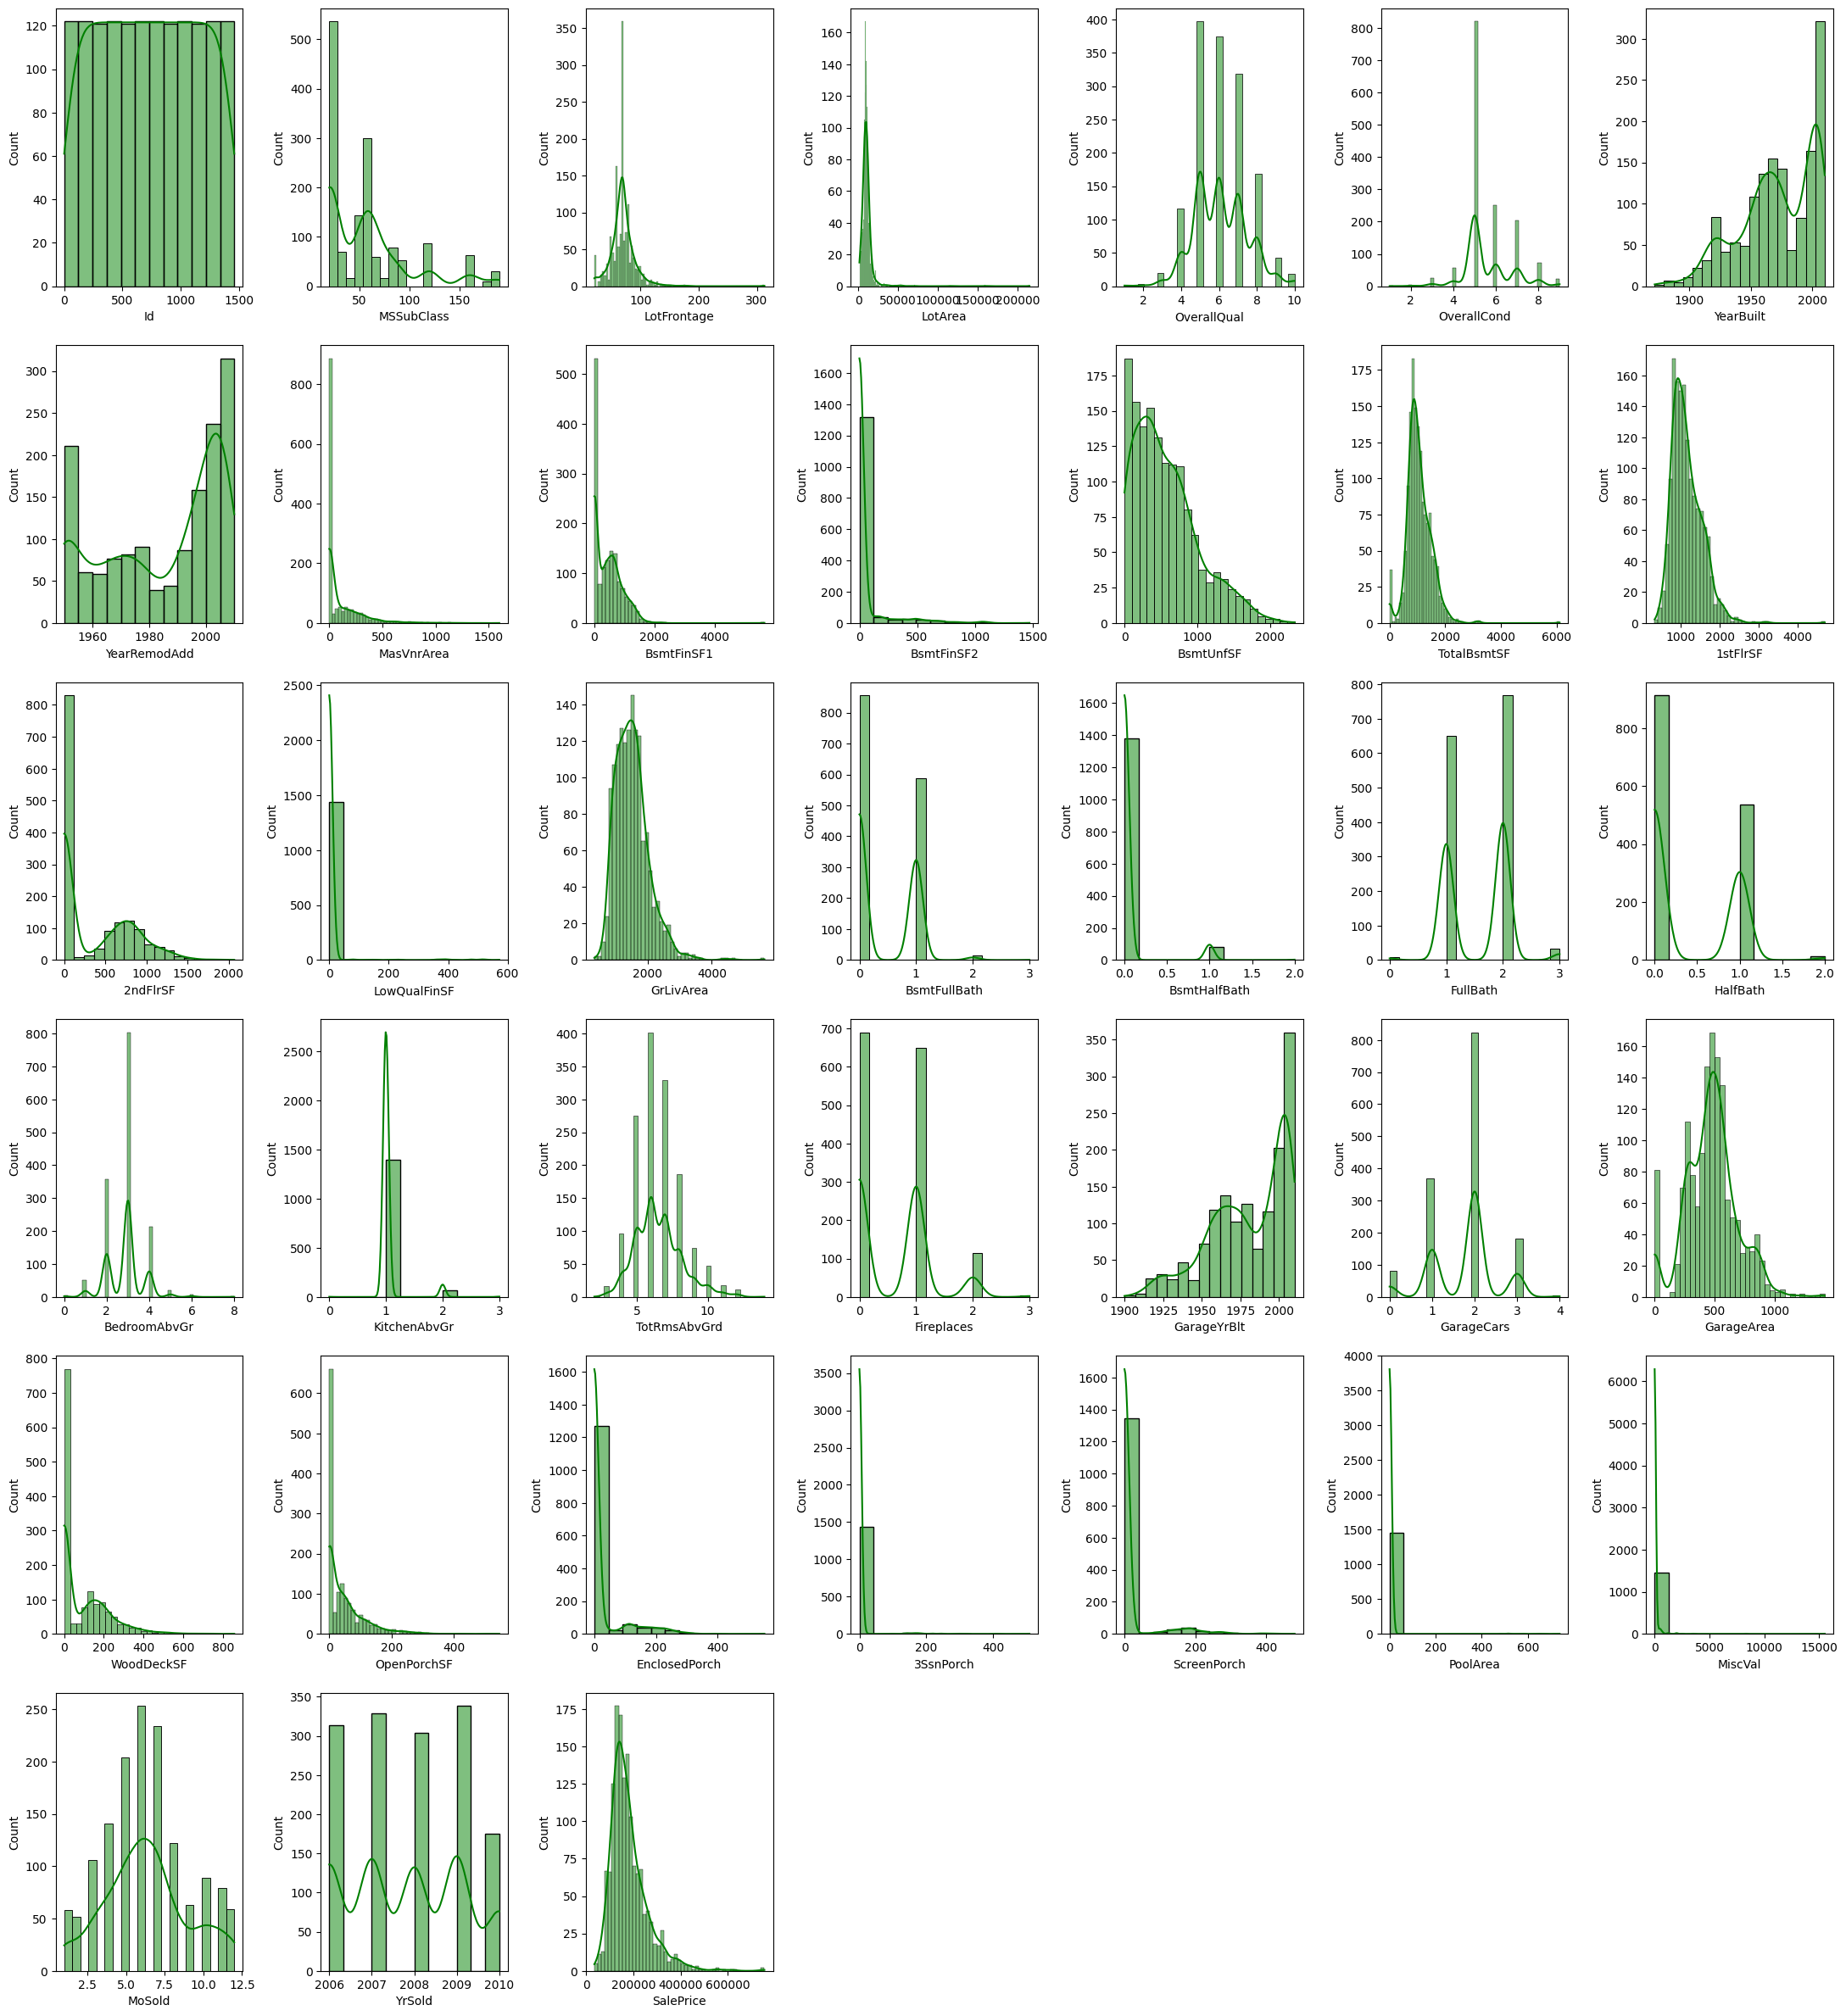

In [45]:
#Plotting distributions to check skewness from the features
#plot for numerical columns only
fig = plt.figure(figsize=(22,24))
for ind,col in enumerate(train_data.select_dtypes(exclude=['object'])):
    plt.subplot(6,7,ind+1)
    sns.histplot(train_data.loc[:,col].dropna(),kde = True,color = 'green')
fig.tight_layout(pad=1.5)

In [46]:
# Skewed columns : LowQualFinSF, 3SsnPorch, PoolArea, MiscVal,LotArea
# We apply log transformation in those columns which contain continuous values. we can not apply log transformation on non-continuous columns because these columns will be filled with infinity or some Nan values which we don't want.
# So, we apply log transformation to LotArea column which is the continuous column and we will drop other 4 columns

# Log Transformation
train_data['LotArea'] = np.log(train_data['LotArea'])

In [47]:
s_cols = ['LowQualFinSF','3SsnPorch','PoolArea','MiscVal']
train_data.drop(s_cols,axis=1,inplace=True)

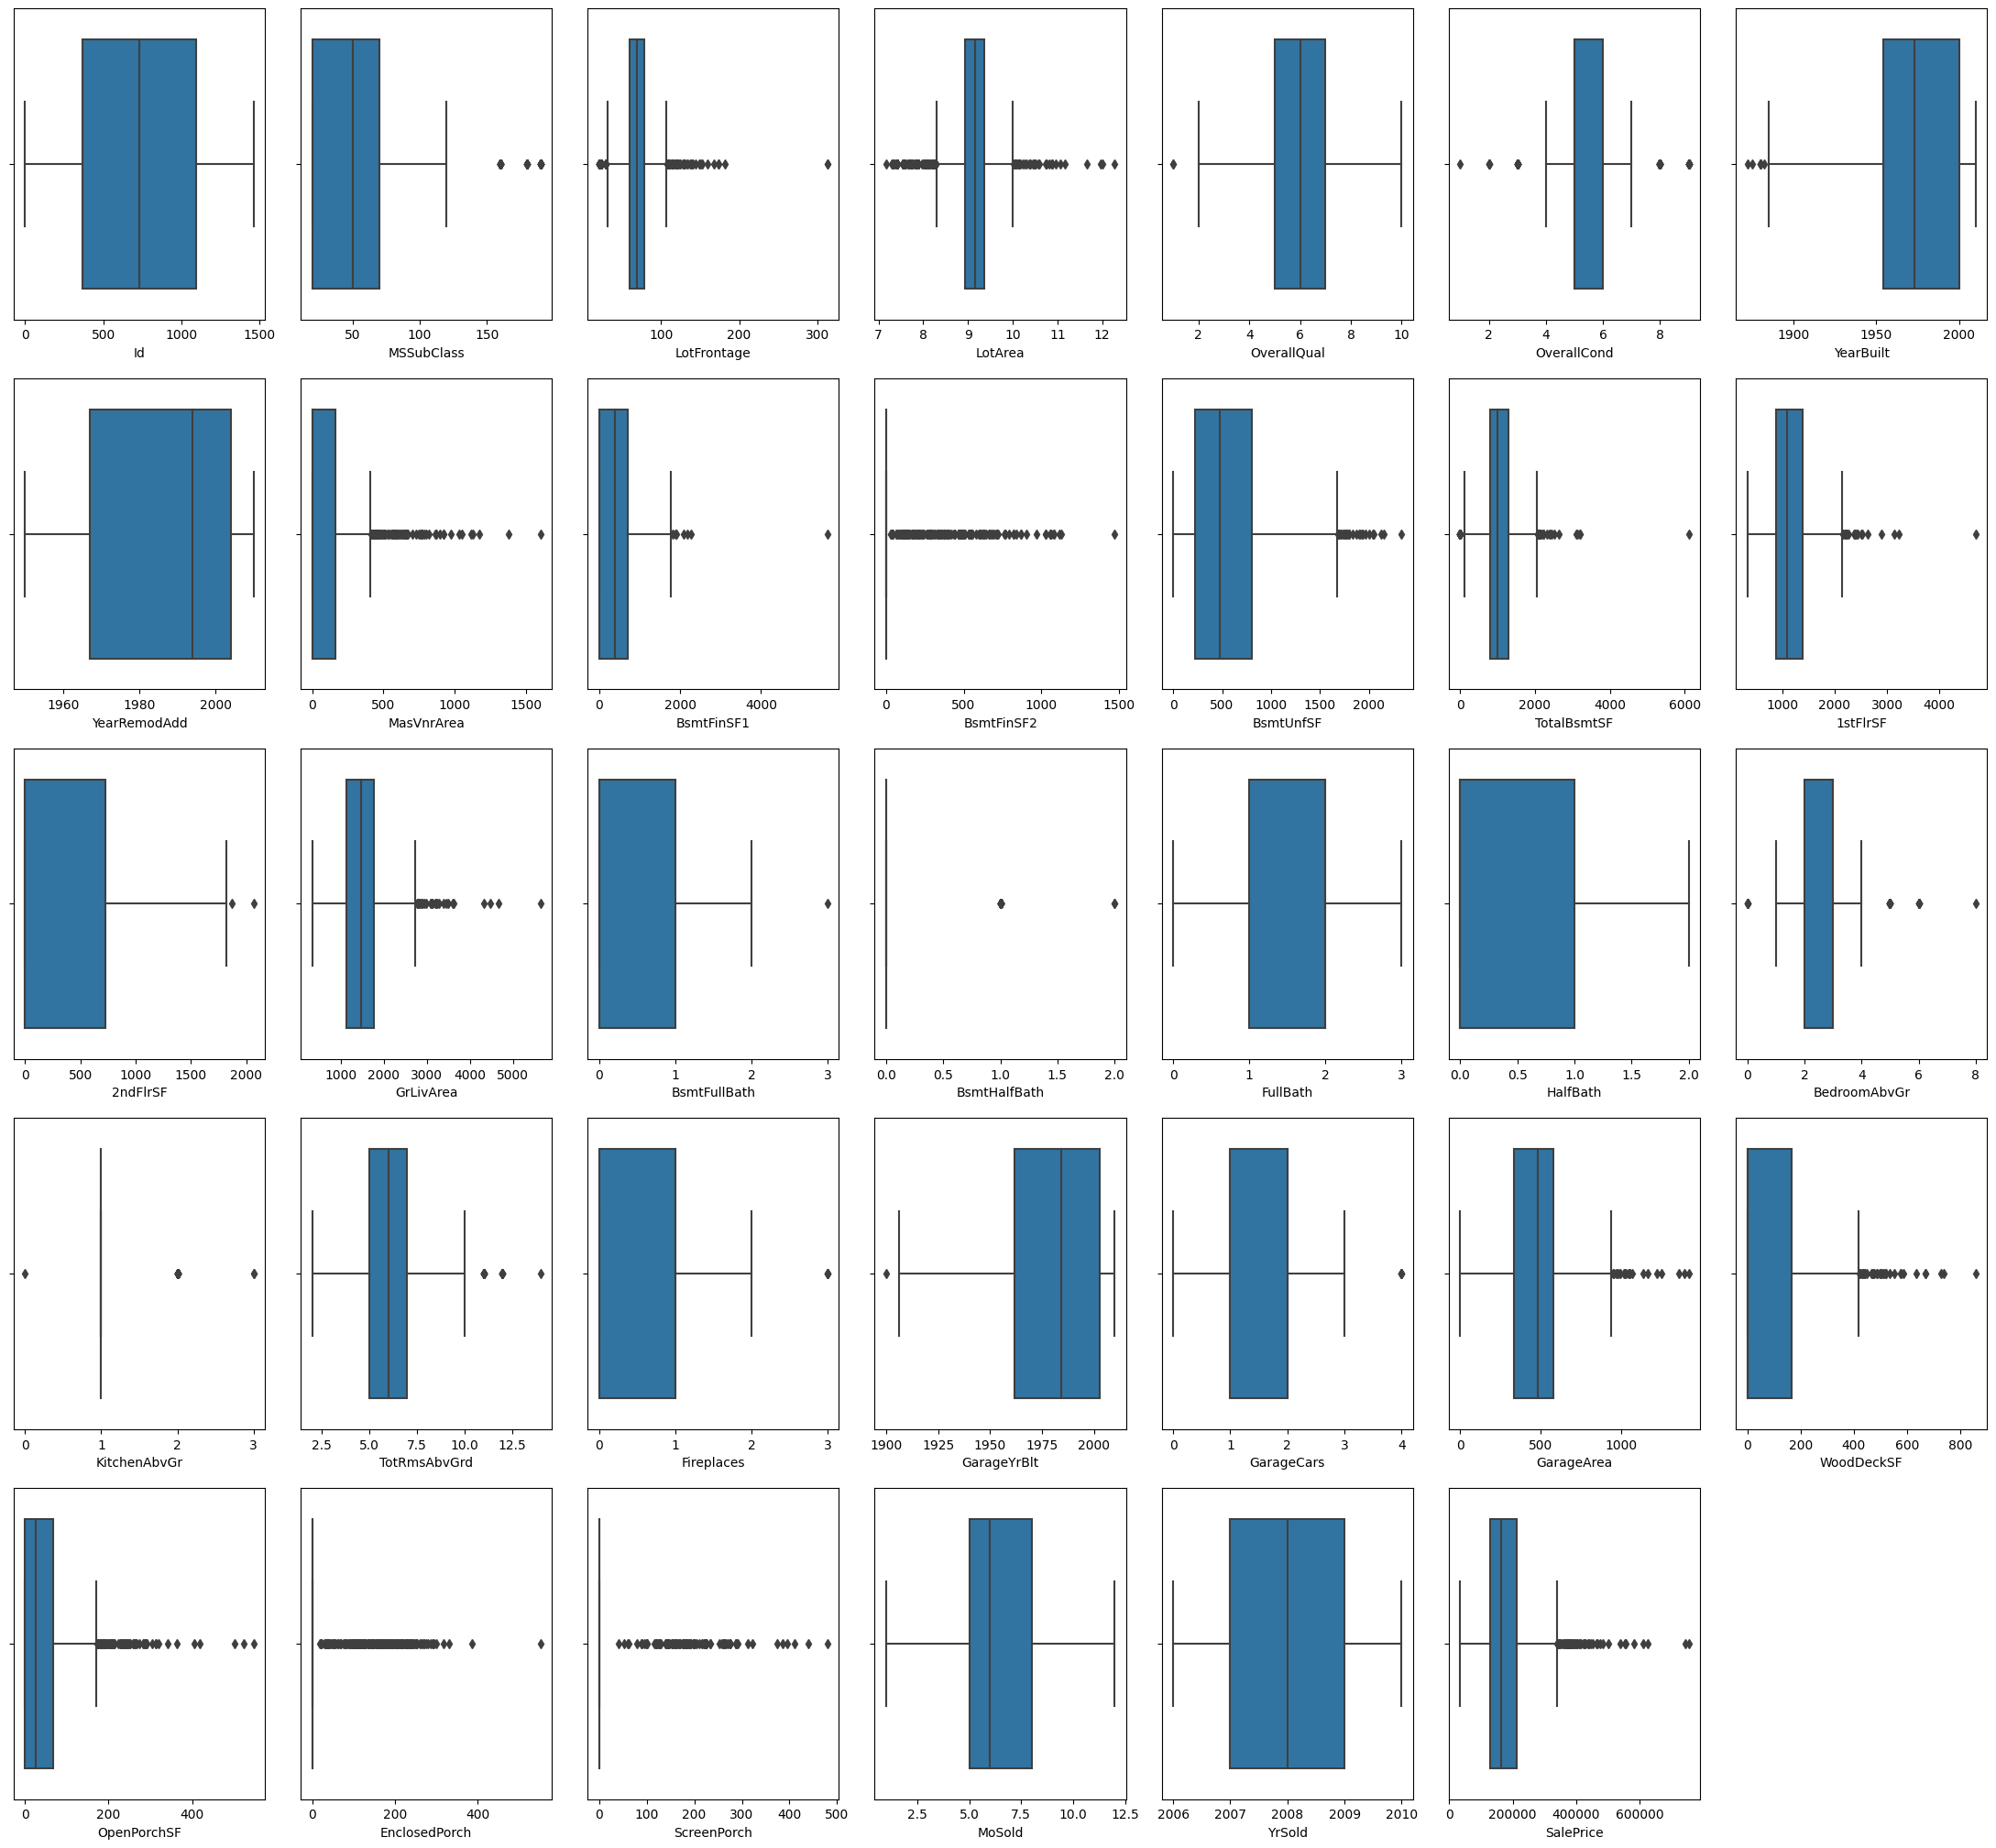

In [48]:
#Use Box Plot to check for outliars
#plot for numerical columns only
fig = plt.figure(figsize=(22,24))
for ind,col in enumerate(train_data.select_dtypes(exclude=['object'])):
    plt.subplot(6,7,ind+1)
    sns.boxplot(x = train_data.loc[:,col].dropna(), data = train_data)
fig.tight_layout(pad=1.5)

In [49]:
# Finding Outliers

for col in train_data.select_dtypes(exclude=['object']).columns:
    first_quartile = train_data[col].quantile(0.25)
    third_quartile = train_data[col].quantile(0.75)

    IQR = third_quartile - first_quartile
    out = third_quartile + 3*IQR
    train_data.drop(train_data[train_data[col] > out].index,axis=0,inplace=True)

In [50]:
train_data.drop(['Id','GarageCars'],axis=1,inplace=True)

##Data manipulation

In [51]:
# Use LabelEncoder Function to encode the categorical data into Numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = train_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
  train_data[col] = le.fit_transform(train_data[col])

In [52]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,9.041922,1,3,3,0,4,0,...,2,0,61,0,0,2,2008,8,4,208500
2,60,3,68.0,9.328123,1,0,3,0,4,0,...,2,0,42,0,0,9,2008,8,4,223500
4,60,3,84.0,9.565214,1,0,3,0,2,0,...,2,192,84,0,0,12,2008,8,4,250000
5,50,3,85.0,9.554993,1,0,3,0,4,0,...,2,40,30,0,0,10,2009,8,4,143000
6,20,3,75.0,9.218705,1,3,3,0,4,0,...,2,255,57,0,0,8,2007,8,4,307000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,180,4,35.0,8.209308,1,3,3,0,4,0,...,2,0,28,0,0,5,2006,8,4,145000
1453,20,3,90.0,9.753653,1,3,3,0,4,0,...,2,36,56,0,0,7,2006,8,0,84500
1454,20,1,62.0,8.922658,1,3,3,0,4,0,...,2,0,113,0,0,10,2009,8,4,185000
1455,60,3,62.0,8.976768,1,3,3,0,4,0,...,2,0,40,0,0,8,2007,8,4,175000


In [53]:
#Put data before splitting
y = train_data['SalePrice']
x = train_data.drop(['SalePrice'], axis =1)

In [54]:
print(x.shape)
print(y.shape)

(881, 70)
(881,)


In [55]:
#Split data into 80% train and 20% validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [56]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(704, 70)
(177, 70)
(704,)
(177,)


##Model selection

In [57]:
#use XGBRegressor Model
import xgboost as xg
xgb = xg.XGBRegressor()

In [58]:
#RandomizedSearchCV Model is applied to choose the best hyperparameters for XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
param = {
    'n_estimators': [300,200,100,400,500,600,700,900],
    'max_depth' :[6,3,7,8,9,5,4],
    'learning_rate' : [0.1,0.2,0.01,0.001,0.0001,0.02,0.002,0.5],
    'alpha': [10,14,20,22,30],
    'booster' : ['gbtree','gblinear'],
}
mod = RandomizedSearchCV(estimator = xgb, param_distributions= param, n_iter = 20)
model = mod.fit(x_train,y_train)

[12:05:06] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth" } are not used.

[12:05:06] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth" } are not used.

[12:05:06] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth" } are not used.

[12:05:07] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth" } are not used.

[12:05:07] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth" } are not used.

[12:05:16] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth" } are not used.

[12:05:16] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth" } are not used.

[12:05:17] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth" } are not used.

[12:05:17] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth" } are not used.

[12:05:17] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth" } are not used.

[12:05:17] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth" } are not used.

[12:05:17] WARNING: ../src/learner.cc:767: 

In [59]:
model.best_params_

{'n_estimators': 900,
 'max_depth': 3,
 'learning_rate': 0.2,
 'booster': 'gblinear',
 'alpha': 10}

In [60]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, model.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 453781847.6193


In [61]:
model.score(x_test,y_test)

0.8976211956648084

In [62]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, model.predict(x_test))
print("The mean absolute percentage error on test set: {:.4f}".format(mape))

The mean absolute percentage error on test set: 0.0904
